In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

y_pred = clf.predict(X)
print("clf.score = ", clf.score(X, y))
print("AC = ", accuracy_score(y_pred, y))

clf.score =  1.0
AC =  1.0


In [8]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
clf.get_depth()

5

In [10]:
# Decision Tree (Split data by order 80% vs. 20%)
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

position = int(len(X) * 80 / 100)

X_train = X[:position]
y_train = y[:position]

X_test = X[position:]
y_test = y[position:]

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("Train clf.score = ", clf.score(X_train, y_train))
print("Train AC = ", accuracy_score(y_pred, y_train))
print()

y_pred = clf.predict(X_test)
print("Test clf.score = ", clf.score(X_test, y_test))
print("Test AC = ", accuracy_score(y_pred, y_test))

Train clf.score =  1.0
Train AC =  1.0

Test clf.score =  0.8
Test AC =  0.8


>90, train: 1.000, test: 1.000
>80, train: 1.000, test: 0.767
>70, train: 1.000, test: 0.778
>60, train: 1.000, test: 0.167
>50, train: 1.000, test: 0.333
>40, train: 1.000, test: 0.444
>30, train: 1.000, test: 0.048
>20, train: 1.000, test: 0.167
>10, train: 1.000, test: 0.259


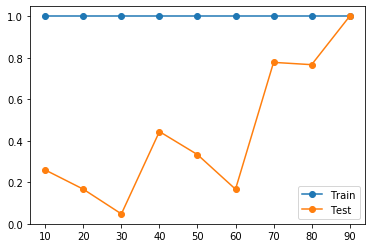

In [12]:
# Decision Tree (Split data by order from 90~10%)
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

ratio = 90
ratiovalues = [i for i in range(ratio, 0, -10)]
train_scores = []
test_scores = []

for i in ratiovalues:
    position = int(len(X) * i / 100)

    X_train = X[:position]
    y_train = y[:position]

    X_test = X[position:]
    y_test = y[position:]

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    train_acc = accuracy_score(y_pred_train, y_train)
    train_scores.append(train_acc)
    
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_pred_test, y_test)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [11]:
# Decision Tree (Split data randomly 80% vs. 20%)
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=71) #train_size = 0.8

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("Train clf.score = ", clf.score(X_train, y_train))
print("Train AC = ", accuracy_score(y_pred, y_train))
print()

y_pred = clf.predict(X_test)
print("Test clf.score = ", clf.score(X_test, y_test))
print("Test AC = ", accuracy_score(y_pred, y_test))

Train clf.score =  1.0
Train AC =  1.0

Test clf.score =  0.9333333333333333
Test AC =  0.9333333333333333


>10, train: 1.000, test: 0.933
>20, train: 1.000, test: 0.933
>30, train: 1.000, test: 0.911
>40, train: 1.000, test: 0.933
>50, train: 1.000, test: 0.947
>60, train: 1.000, test: 0.933
>70, train: 1.000, test: 0.933
>80, train: 1.000, test: 0.942
>90, train: 1.000, test: 0.956


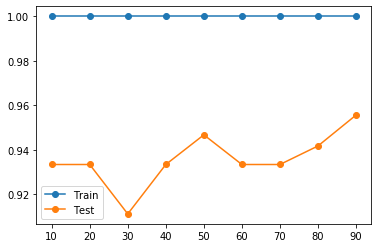

In [13]:
# Decision Tree (Split data randomly from 90~10%)
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
train_scores = []
test_scores = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=71)

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    train_acc = accuracy_score(y_pred_train, y_train)
    train_scores.append(train_acc)
    
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_pred_test, y_test)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

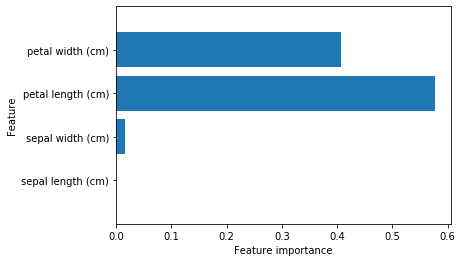

In [14]:
# Important feature or feature importances
from sklearn import tree
from sklearn.datasets import load_iris

def plot_feature_importances(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=71) #train_size = 0.8

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
plot_feature_importances(clf)

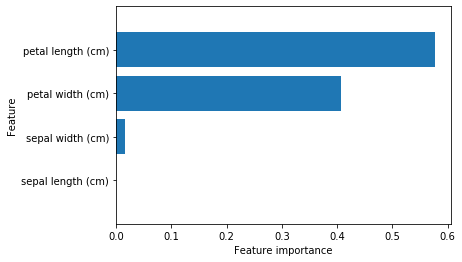

In [15]:
# Sort important feature or feature importances by importances
from sklearn import tree
from sklearn.datasets import load_iris

def plot_feature_importances(model):
    n_features = iris.data.shape[1]
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(np.arange(n_features), importances[indices], align='center')
    feature_names = np.array(iris.feature_names)
    plt.yticks(np.arange(n_features), feature_names[indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=71) #train_size = 0.8

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
plot_feature_importances(clf)

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = RandomForestClassifier()
clf.fit(X,y)

In [ ]:
# XGBoost 1
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = XGBClassifier()
clf.fit(X,y)

In [ ]:
# XGBoost 2
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target
clf = XGBClassifier()
clf.fit(X,y)

In [ ]:
# SVC
from sklearn import svm
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = svm.SVC()
clf.fit(X,y)

In [1]:
# KNN
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)

KNeighborsClassifier()

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = LogisticRegression()
clf.fit(X,y)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()